In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
df = pd.read_csv('All_Shark_Data.csv', parse_dates=['Date'])
analytics = pd.read_csv('AllSharkAnalytical.csv')
two_cols = pd.read_csv('All_Shark_Data_2NewCols.csv')
df.rename(columns={'Eat_Total ': 'Eat_Total'}, inplace=True)
df.head(10)

import seaborn as sns
sns.set_style('darkgrid')
df

Date  Eat_Ross  Eat_Chandler  Eat_BT1  Eat_BT2  Eat_BT3  Eat_BT4  \
0   2017-12-05       0.0           5.0      3.0      6.0      5.0      4.0   
1   2017-12-07       1.0           0.0      0.0      2.0      0.0      0.0   
2   2017-12-09       NaN           NaN      NaN      NaN      NaN      NaN   
3   2017-12-10       5.0           1.0      1.0      3.0      2.0      2.0   
4   2017-12-12       2.0           2.0      0.0      5.0      2.0      4.0   
..         ...       ...           ...      ...      ...      ...      ...   
577 2020-09-22       6.0           0.0      1.0      2.0      6.0      0.0   
578 2020-09-24       0.0           9.0      0.0      7.0      5.0      5.0   
579 2020-09-26       NaN           NaN      NaN      NaN      NaN      NaN   
580 2020-09-27       5.0           6.0      3.0      6.0      4.0      6.0   
581 2020-09-29      10.0           3.0      1.0      1.0      4.0      2.0   

     Eat_BT5  Eat_GR1  Eat_GR2  ...  Mazuri Vitamins  Garlic  Salmon  Bonito  \
0        4.0      0.0      0.0  ...              1.0     1.0     0.0     0.0   
1        0.0      0.0      0.0  ...              1.0     1.0     0.0     0.0   
2        NaN      2.0      0.0  ...              0.0     1.0     0.0     0.0   
3        0.0      NaN      NaN  ...              0.0     1.0     0.0     0.0   
4        5.0      0.0      2.0  ...              1.0     1.0     0.0     0.0   
..       ...      ...      ...  ...              ...     ...     ...     ...   
577      4.0      1.0      0.0  ...              1.0     1.0     0.0     0.0   
578      7.0      0.0      1.0  ...              1.0     1.0     0.0     0.0   
579      NaN      4.0      0.0  ...              0.0     0.0     0.0     0.0   
580      3.0      NaN      NaN  ...              0.0     1.0     0.0     0.0   
581      7.0      4.0      4.0  ...              1.0     1.0     0.0     0.0   

     Bluefish  Mahi  Goggle Eye  Humbolt Squid  BT/SB Location (1-6)  \
0         0.0   0.0         0.0            0.0                   1.0   
1         0.0   0.0         0.0            0.0                   1.0   
2         0.0   0.0         0.0            0.0                   NaN   
3         0.0   0.0         0.0            0.0                   1.0   
4         0.0   0.0         0.0            0.0                   1.0   
..        ...   ...         ...            ...                   ...   
577       0.0   0.0         0.0            0.0                   2.0   
578       0.0   0.0         0.0            0.0                   4.0   
579       0.0   0.0         0.0            0.0                   NaN   
580       0.0   0.0         0.0            0.0                   3.0   
581       0.0   0.0         0.0            0.0                   1.0   

     GR Location (1-6)  
0                  3.0  
1                  3.0  
2                  3.0  
3                  NaN  
4                  3.0  
..                 ...  
577                1.0  
578                2.0  
579                3.0  
580                NaN  
581                4.0  

[582 rows x 61 columns]

In [3]:
min(df.Date)

Timestamp('2017-12-05 00:00:00')

In [17]:
df.to_csv('shard_data2.0.csv')



In [5]:
df.at[60, 'Date'] = datetime.datetime.strptime('2018-03-22', "%Y-%m-%d")

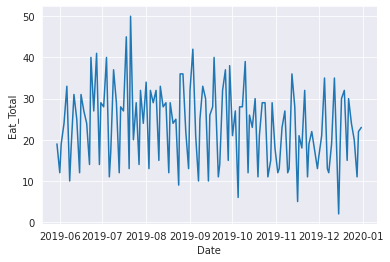

In [4]:
import seaborn as sns
ax = sns.lineplot(x=df2019.Date, y=df2019.Eat_Total, data=df2019)

In [2]:
# consolidate food combos into single column
food_combo = []
foods = ['Saury', 'Blue Runner', 'Squid', 'Mackerel', 'Herring', 'Sardine',
         'Salmon', 'Bonito', 'Bluefish', 'Mahi', 'Goggle Eye', 'Humbolt Squid', 'Garlic']

for index, row in df.iterrows():
    food = ''
    
    for item in foods:
        if row[item] == 1:
            food += item + '_'
    # get rid of extra _
    food = food[0:(len(food)-1)]
            
    food_combo.append(food)

df['food_combo'] = food_combo

food_combos2 = df[['food_combo', 'Salmon']].groupby(['food_combo']).count().reset_index().rename(columns={'Salmon':'counts'})
food_combos2 = food_combos2.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
food_combos2

food_combo  counts
0                       Mackerel_Garlic     108
1                          Saury_Garlic      96
2                               Herring      89
3              Blue Runner_Squid_Garlic      67
4                        Herring_Garlic      33
5                              Mackerel      29
6                   Saury_Salmon_Garlic      25
7                    Blue Runner_Garlic      16
8                                 Saury      16
9                     Blue Runner_Squid      10
10      Blue Runner_Squid_Salmon_Garlic       9
11        Blue Runner_Squid_Mahi_Garlic       6
12                                            6
13                          Blue Runner       6
14      Blue Runner_Squid_Bonito_Garlic       5
15                               Garlic       5
16                         Squid_Garlic       4
17              Mackerel_Herring_Garlic       4
18                        Squid_Herring       3
19                         Saury_Salmon       3
20    Blue Runner_Squid_Bluefish_Garlic       3
21  Blue Runner_Squid_Goggle Eye_Garlic       2
22                   Saury_Squid_Garlic       2
23            Herring_Goggle Eye_Garlic       2
24                 Squid_Herring_Garlic       2
25                Squid_Bluefish_Garlic       2
26    Squid_Bonito_Humbolt Squid_Garlic       1
27            Blue Runner_Bonito_Garlic       1
28                                Squid       1
29                  Squid_Bonito_Garlic       1
30                        Bonito_Garlic       1
31          Blue Runner_Bluefish_Garlic       1
32                       Saury_Mackerel       1
33        Squid_Herring_Bluefish_Garlic       1
34           Squid_Humbolt Squid_Garlic       1
35                       Squid_Mackerel       1
36               Squid_Mackerel_Herring       1
37                Saury_Mackerel_Garlic       1
38                   Blue Runner_Salmon       1
39                        Saury_Herring       1
40                      Bluefish_Garlic       1
41      Saury_Blue Runner_Salmon_Garlic       1
42            Blue Runner_Salmon_Garlic       1
43                        Salmon_Garlic       1
44   Salmon_Bonito_Humbolt Squid_Garlic       1
45             Salmon_Bonito_Goggle Eye       1
46                               Salmon       1
47                                 Mahi       1
48                 Mackerel_Mahi_Garlic       1
49      Blue Runner_Squid_Bluefish_Mahi       1
50             Blue Runner_Squid_Bonito       1
51                   Herring_Goggle Eye       1
52                Herring_Bonito_Garlic       1
53    Blue Runner_Squid_Mackerel_Garlic       1
54  Squid_Mackerel_Humbolt Squid_Garlic       1

In [3]:
food_combos2.counts.sum()

582

In [15]:
import warnings
warnings.filterwarnings('ignore')

eats = df[['food_combo', 'Eat_Total']].groupby(['food_combo']).sum().reset_index()
counts = df[['food_combo', 'Eat_Total']].groupby(['food_combo']).count().reset_index().rename(columns={'Eat_Total':'counts'})
targets = df[['food_combo', 'Target_Total']].groupby(['food_combo']).sum().reset_index()
drops = df[['food_combo', 'Drop_Total']].groupby(['food_combo']).sum().reset_index()
garlic = df[['food_combo', 'Garlic']].groupby(['food_combo']).sum().reset_index()
vitamins = df[['food_combo', 'Mazuri Vitamins']].groupby(['food_combo']).sum().reset_index()
# eats = eats.sort_values(by=['Eat_Total'], ascending=False).reset_index().drop(columns=['index'])

counts['target_total'] = targets.Target_Total
counts['eat_totals'] = eats.Eat_Total 
counts['drop_totals'] = drops.Drop_Total
counts['total_garlic'] = garlic.Garlic
counts['total_vitamins'] = vitamins['Mazuri Vitamins']
# counts['total_target_eat_drop'] = counts.target_total + counts.eat_totals + counts.drop_totals
counts['eat_pct'] = round(counts.eat_totals / counts.counts, 1)
counts['drop_target_pct'] = round(drops.Drop_Total / targets.Target_Total, 2)
counts = counts.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
counts_adj = counts[0:21]
counts_adj['eat_target_pct'] = round(counts_adj.eat_totals / counts_adj.target_total, 2)
counts_adj

food_combo  counts  target_total  eat_totals  \
0                     Mackerel_Garlic     108          6464        2099   
1                        Saury_Garlic      96          6239        2612   
2                             Herring      89          2120        1013   
3            Blue Runner_Squid_Garlic      67          4854        1894   
4                      Herring_Garlic      33          1111         402   
5                            Mackerel      29          1634         454   
6                 Saury_Salmon_Garlic      25          1336         652   
7                  Blue Runner_Garlic      16          1034         363   
8                               Saury      16          1096         385   
9                   Blue Runner_Squid      10           684         206   
10    Blue Runner_Squid_Salmon_Garlic       9           610         256   
11      Blue Runner_Squid_Mahi_Garlic       6           438         166   
12                                          6           149          55   
13                        Blue Runner       6           369         112   
14    Blue Runner_Squid_Bonito_Garlic       5           363         139   
15                             Garlic       5           354         111   
16                       Squid_Garlic       4           283          86   
17            Mackerel_Herring_Garlic       4           230          83   
18                      Squid_Herring       3           115          41   
19                       Saury_Salmon       3           191          89   
20  Blue Runner_Squid_Bluefish_Garlic       3           260          66   

    drop_totals  total_garlic  total_vitamins  eat_pct  drop_target_pct  \
0           338         108.0             2.0     19.4             0.05   
1           368          96.0            84.0     27.2             0.06   
2            85           0.0             2.0     11.4             0.04   
3           354          67.0            62.0     28.3             0.07   
4            68          33.0             1.0     12.2             0.06   
5           115           0.0             2.0     15.7             0.07   
6            86          25.0            23.0     26.1             0.06   
7            91          16.0            12.0     22.7             0.09   
8            78           0.0             2.0     24.1             0.07   
9            81           0.0             2.0     20.6             0.12   
10           44           9.0             9.0     28.4             0.07   
11           34           6.0             6.0     27.7             0.08   
12           14           0.0             0.0      9.2             0.09   
13           30           0.0             1.0     18.7             0.08   
14           25           5.0             5.0     27.8             0.07   
15           10           5.0             2.0     22.2             0.03   
16            7           4.0             3.0     21.5             0.02   
17           11           4.0             0.0     20.8             0.05   
18            2           0.0             0.0     13.7             0.02   
19            7           0.0             0.0     29.7             0.04   
20           13           3.0             3.0     22.0             0.05   

    eat_target_pct  
0             0.32  
1             0.42  
2             0.48  
3             0.39  
4             0.36  
5             0.28  
6             0.49  
7             0.35  
8             0.35  
9             0.30  
10            0.42  
11            0.38  
12            0.37  
13            0.30  
14            0.38  
15            0.31  
16            0.30  
17            0.36  
18            0.36  
19            0.47  
20            0.25

In [50]:
df_bt2 = df[['Date', 'Eat_BT1', 'Eat_BT5', 'Eat_GR1', 'Eat_Ross', 'Eat_Chandler', 'Drop_BT1',
              'Drop_BT5', 'Drop_GR1', 'Drop_Ross', 'Drop_Chandler', 'Target_BT1',
              'Target_BT5', 'Target_GR1', 'Target_Ross', 'Target_Chandler',
               'Temperature', 'BT/SB Location (1-6)', 'food_combo', 'food_combogarlic', 'Garlic', 'Mazuri Vitamins']]
df_bt2['Eat_Total'] = df_bt2.Eat_BT1 + df_bt2.Eat_BT5 + df_bt2.Eat_GR1 + df_bt2.Eat_Ross + df_bt2.Eat_Chandler
df_bt2['Target_Total'] = df_bt2.Target_BT1 + df_bt2.Target_BT5 + df_bt2.Target_GR1 + df_bt2.Target_Ross + df_bt2.Target_Chandler
df_bt2['Drop_Total'] = df_bt2.Drop_BT1 + df_bt2.Drop_BT5 + df_bt2.Drop_GR1 + df_bt2.Drop_Ross + df_bt2.Drop_Chandler


eats = df_bt2[['food_combogarlic', 'Eat_Total']].groupby(['food_combogarlic']).sum().reset_index()
counts = df_bt2[['food_combogarlic', 'Eat_Total']].groupby(['food_combogarlic']).count().reset_index().rename(
    columns={'Eat_Total':'counts'})
targets = df_bt2[['food_combogarlic', 'Target_Total']].groupby(['food_combogarlic']).sum().reset_index()
drops = df_bt2[['food_combogarlic', 'Drop_Total']].groupby(['food_combogarlic']).sum().reset_index()
garlic = df_bt2[['food_combogarlic', 'Garlic']].groupby(['food_combogarlic']).sum().reset_index()
vitamins = df_bt2[['food_combogarlic', 'Mazuri Vitamins']].groupby(['food_combogarlic']).sum().reset_index()
# eats = eats.sort_values(by=['Eat_Total'], ascending=False).reset_index().drop(columns=['index'])

counts['target_total'] = targets.Target_Total
counts['eat_totals'] = eats.Eat_Total 
counts['drop_totals'] = drops.Drop_Total
counts['total_garlic'] = garlic.Garlic
counts['total_vitamins'] = vitamins['Mazuri Vitamins']
# counts['total_target_eat_drop'] = counts.target_total + counts.eat_totals + counts.drop_totals
counts['eat_avg'] = round(counts.eat_totals / counts.counts, 1)
counts = counts.sort_values(by=['counts'], ascending=False).reset_index().drop(columns=['index'])
counts_adj_bt2 = counts[0:20]
counts_adj_bt2['eat_target_pct'] = round(counts_adj_bt2.eat_totals / counts_adj_bt2.target_total, 2)
counts_adj_bt2['avg_targets'] = round(counts_adj_bt2.target_total / counts_adj_bt2.counts, 2)
counts_adj_bt2

food_combogarlic  counts  target_total  eat_totals  \
0                          Saury_Garlic      96        3134.0      1250.0   
1              Blue Runner_Squid_Garlic      67        2552.0       925.0   
2                   Saury_Salmon_Garlic      25         611.0       284.0   
3                    Blue Runner_Garlic      16         566.0       180.0   
4                                 Saury      16         545.0       177.0   
5       Blue Runner_Squid_Salmon_Garlic       9         296.0       114.0   
6                     Blue Runner_Squid       9         341.0       105.0   
7         Blue Runner_Squid_Mahi_Garlic       6         237.0        69.0   
8                           Blue Runner       5         174.0        53.0   
9       Blue Runner_Squid_Bonito_Garlic       5         171.0        67.0   
10                         Squid_Garlic       4         137.0        39.0   
11                             Mackerel       4         128.0        84.0   
12    Blue Runner_Squid_Bluefish_Garlic       3         113.0        25.0   
13                         Saury_Salmon       3          92.0        42.0   
14                   Saury_Squid_Garlic       2          78.0        33.0   
15                Squid_Bluefish_Garlic       2          25.0        14.0   
16                                            2          87.0        27.0   
17              Mackerel_Herring_Garlic       2          50.0        33.0   
18  Blue Runner_Squid_Goggle Eye_Garlic       2         113.0        26.0   
19                        Bonito_Garlic       1          52.0        19.0   

    drop_totals  total_garlic  total_vitamins  eat_avg  eat_target_pct  \
0         168.0         103.0            91.0     13.0            0.40   
1         151.0          67.0            62.0     13.8            0.36   
2          31.0          25.0            23.0     11.4            0.46   
3          37.0          16.0            12.0     11.2            0.32   
4          40.0           0.0             2.0     11.1            0.32   
5          18.0           9.0             9.0     12.7            0.39   
6          34.0           0.0             2.0     11.7            0.31   
7          12.0           6.0             6.0     11.5            0.29   
8          12.0           0.0             1.0     10.6            0.30   
9           8.0           5.0             5.0     13.4            0.39   
10          4.0           4.0             3.0      9.8            0.28   
11          0.0           0.0             2.0     21.0            0.66   
12          4.0           3.0             3.0      8.3            0.22   
13          3.0           0.0             0.0     14.0            0.46   
14          8.0           2.0             2.0     16.5            0.42   
15          4.0           2.0             2.0      7.0            0.56   
16          6.0           0.0             0.0     13.5            0.31   
17          0.0           4.0             0.0     16.5            0.66   
18          5.0           2.0             2.0     13.0            0.23   
19          2.0           1.0             1.0     19.0            0.37   

    avg_targets  
0         32.65  
1         38.09  
2         24.44  
3         35.38  
4         34.06  
5         32.89  
6         37.89  
7         39.50  
8         34.80  
9         34.20  
10        34.25  
11        32.00  
12        37.67  
13        30.67  
14        39.00  
15        12.50  
16        43.50  
17        25.00  
18        56.50  
19        52.00

In [3]:
df['month'] = pd.DatetimeIndex(df.Date).month_name()
df['year'] = pd.DatetimeIndex(df.Date).year
df['day'] = pd.DatetimeIndex(df.Date).day_name()
df

Date  Eat_Ross  Eat_Chandler  Eat_BT1  Eat_BT2  Eat_BT3  Eat_BT4  \
0   2017-12-05       0.0           5.0      3.0      6.0      5.0      4.0   
1   2017-12-07       1.0           0.0      0.0      2.0      0.0      0.0   
2   2017-12-09       NaN           NaN      NaN      NaN      NaN      NaN   
3   2017-12-10       5.0           1.0      1.0      3.0      2.0      2.0   
4   2017-12-12       2.0           2.0      0.0      5.0      2.0      4.0   
..         ...       ...           ...      ...      ...      ...      ...   
577 2020-09-22       6.0           0.0      1.0      2.0      6.0      0.0   
578 2020-09-24       0.0           9.0      0.0      7.0      5.0      5.0   
579 2020-09-26       NaN           NaN      NaN      NaN      NaN      NaN   
580 2020-09-27       5.0           6.0      3.0      6.0      4.0      6.0   
581 2020-09-29      10.0           3.0      1.0      1.0      4.0      2.0   

     Eat_BT5  Eat_GR1  Eat_GR2  ...  Bluefish  Mahi  Goggle Eye  \
0        4.0      0.0      0.0  ...       0.0   0.0         0.0   
1        0.0      0.0      0.0  ...       0.0   0.0         0.0   
2        NaN      2.0      0.0  ...       0.0   0.0         0.0   
3        0.0      NaN      NaN  ...       0.0   0.0         0.0   
4        5.0      0.0      2.0  ...       0.0   0.0         0.0   
..       ...      ...      ...  ...       ...   ...         ...   
577      4.0      1.0      0.0  ...       0.0   0.0         0.0   
578      7.0      0.0      1.0  ...       0.0   0.0         0.0   
579      NaN      4.0      0.0  ...       0.0   0.0         0.0   
580      3.0      NaN      NaN  ...       0.0   0.0         0.0   
581      7.0      4.0      4.0  ...       0.0   0.0         0.0   

     Humbolt Squid  BT/SB Location (1-6)  GR Location (1-6)  \
0              0.0                   1.0                3.0   
1              0.0                   1.0                3.0   
2              0.0                   NaN                3.0   
3              0.0                   1.0                NaN   
4              0.0                   1.0                3.0   
..             ...                   ...                ...   
577            0.0                   2.0                1.0   
578            0.0                   4.0                2.0   
579            0.0                   NaN                3.0   
580            0.0                   3.0                NaN   
581            0.0                   1.0                4.0   

                            food_combo      month  year       day  
0                         Saury_Garlic   December  2017   Tuesday  
1    Blue Runner_Squid_Mackerel_Garlic   December  2017  Thursday  
2                       Herring_Garlic   December  2017  Saturday  
3                      Mackerel_Garlic   December  2017    Sunday  
4                         Saury_Garlic   December  2017   Tuesday  
..                                 ...        ...   ...       ...  
577                       Saury_Garlic  September  2020   Tuesday  
578           Blue Runner_Squid_Garlic  September  2020  Thursday  
579                            Herring  September  2020  Saturday  
580                    Mackerel_Garlic  September  2020    Sunday  
581                       Saury_Garlic  September  2020   Tuesday  

[582 rows x 65 columns]

In [4]:
years = [2018, 2019, 2020]
df_bt = df[['Eat_BT1', 'Eat_BT2', 'Eat_BT3', 'Eat_BT4', 'Eat_BT5', 'year', 'month', 'day']]
df_bt['Total'] = df_bt.Eat_BT1 + df_bt.Eat_BT2 + df_bt.Eat_BT3 + df_bt.Eat_BT4 + df_bt.Eat_BT5
df_bt['AvgPieces_BT'] = df_bt.Total / 5

df_gr = df[['Eat_GR1', 'Eat_GR2', 'Eat_GR3', 'Eat_GR4', 'Eat_GR5', 'year', 'month', 'day']]
df_gr['Total'] = df_gr.Eat_GR1 + df_gr.Eat_GR2 + df_gr.Eat_GR3 + df_gr.Eat_GR4 + df_gr.Eat_GR5
df_gr['AvgPieces_GR'] = df_gr.Total / 5

df_rc = df[['Eat_Ross', 'Eat_Chandler', 'year', 'month', 'day']]
df_rc['Total'] = df_rc.Eat_Ross + df_rc.Eat_Chandler
df_rc['AvgPieces_Ross&Chandler'] = df_rc.Total / 2

for year in years:
    df_months_bt = df_bt[df_bt.year == year]
    df_months_gr = df_gr[df_gr.year == year]
    df_months_rc = df_rc[df_rc.year == year]
    
    if year == 2018:
        months_bt = df_months_bt[['month', 'AvgPieces_BT']].groupby(['month']).mean().reset_index()
        months_bt = months_bt.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
            by='month').reset_index().drop(columns=['index'])
        months_bt['year'] = year
        months_bt['month_adj'] = months_bt['month'] + str(year)
        
        months_gr = df_months_gr[['month', 'AvgPieces_GR']].groupby(['month']).mean().reset_index()
        months_gr = months_gr.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
            by='month').reset_index().drop(columns=['index'])
        months_gr['year'] = year
        months_gr['month_adj'] = months_gr['month'] + str(year)
        
        months_rc = df_months_rc[['month', 'AvgPieces_Ross&Chandler']].groupby(['month']).mean().reset_index()
        months_rc = months_rc.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
            by='month').reset_index().drop(columns=['index'])
        months_rc['year'] = year
        months_rc['month_adj'] = months_rc['month'] + str(year)
    
    else:
        months_2_bt = df_months_bt[['month', 'AvgPieces_BT']].groupby(['month']).mean().reset_index()
        months_2_bt = months_2_bt.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
        by='month').reset_index().drop(columns=['index'])
        
        months_2_bt['year'] = year
        months_2_bt['month_adj'] = months_2_bt['month'] + str(year)
        months_bt = months_bt.append(months_2_bt)
        
        months_2_gr = df_months_gr[['month', 'AvgPieces_GR']].groupby(['month']).mean().reset_index()
        months_2_gr = months_2_gr.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
        by='month').reset_index().drop(columns=['index'])
        
        months_2_gr['year'] = year
        months_2_gr['month_adj'] = months_2_gr['month'] + str(year)
        months_gr = months_gr.append(months_2_gr)
        
        months_2_rc = df_months_rc[['month', 'AvgPieces_Ross&Chandler']].groupby(['month']).mean().reset_index()
        months_2_rc = months_2_rc.replace(dict(zip(month_lookup.id, month_lookup.label))).sort_values(
        by='month').reset_index().drop(columns=['index'])
        
        months_2_rc['year'] = year
        months_2_rc['month_adj'] = months_2_rc['month'] + str(year)
        months_rc = months_rc.append(months_2_rc)
        
    months_bt = months_bt.reset_index().drop(columns=['index', 'month'])
    months_gr = months_gr.reset_index().drop(columns=['index', 'month'])
    months_rc = months_rc.reset_index().drop(columns=['index', 'month'])

months['Avg_BT'] = round(months_bt['AvgPieces_BT'], 2)

months['Avg_GR'] = round(months_gr['AvgPieces_GR'], 2)

months['Avg_Ross&Chandler'] = round(months_rc['AvgPieces_Ross&Chandler'], 2)

months

<ipython-input-4-53c0bfce02ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bt['Total'] = df_bt.Eat_BT1 + df_bt.Eat_BT2 + df_bt.Eat_BT3 + df_bt.Eat_BT4 + df_bt.Eat_BT5
<ipython-input-4-53c0bfce02ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bt['AvgPieces_BT'] = df_bt.Total / 5
<ipython-input-4-53c0bfce02ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

NameError: name 'month_lookup' is not defined

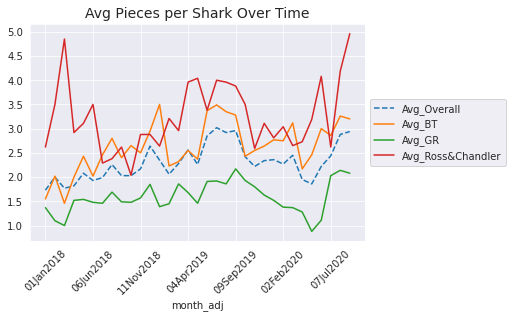

In [38]:
import matplotlib.pylab as plt 
%matplotlib inline

a1 = months.plot(x='month_adj', 
                 y='AvgPiecesPerShark', 
                 label='Avg_Overall',
                 linestyle='--');

plt.plot(months['month_adj'],
         months['Avg_BT'],
         label = 'Avg_BT')

plt.plot(months['month_adj'],
         months['Avg_GR'],
         label = 'Avg_GR')

plt.plot(months['month_adj'],
         months['Avg_Ross&Chandler'],
         label = 'Avg_Ross&Chandler')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation = 45);
plt.title('Avg Pieces per Shark Over Time', size=14);

In [10]:
month_lookup = pd.DataFrame({
       'id':['January','February','March','April','May','June','July','August','September','October','November','December'],
    'label':['01Jan','02Feb','03Mar','04Apr','05May','06Jun','07Jul','08Aug','09Sep','10Oct','11Nov', '12Dec']})

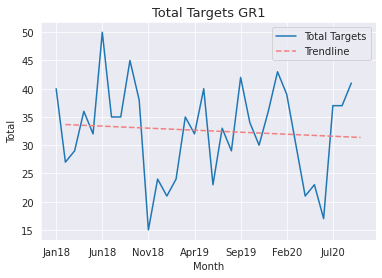

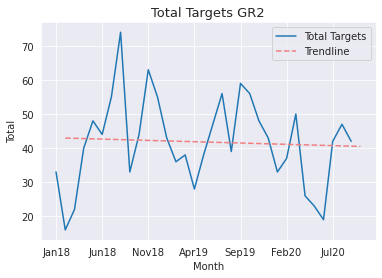

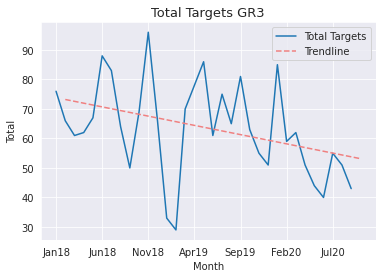

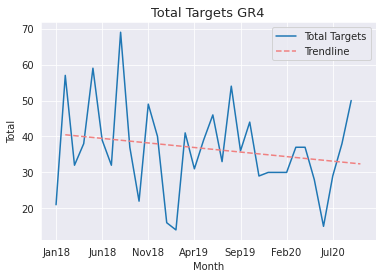

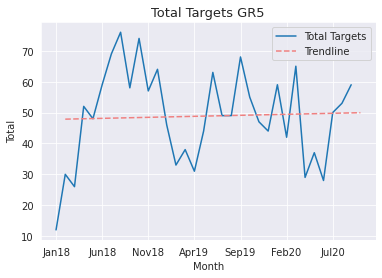

In [51]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np

years = [2018, 2019, 2020]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
count = 0
# sharks = ['Ross', 'Chandler']
# sharks = ['BT1', 'BT2', 'BT3', 'BT4', 'BT5']
sharks = ['GR1', 'GR2', 'GR3', 'GR4', 'GR5']

for shark in sharks:
    df_shark = df[['month', f'Eat_{shark}', f'Target_{shark}', f'Drop_{shark}', 'Garlic', 
                   'Mazuri Vitamins', 'food_combo', 'year']]
    df_shark['Eat_Total'] = df_shark[f'Eat_{shark}']
    df_shark['Target_Total'] = df_shark[f'Target_{shark}']
    df_shark['Drop_Total'] = df_shark[f'Drop_{shark}']
    count = 0
    try:
        if stats.shape[1] > 18:
            del stats
    except:
        pass
    
    for year in years:
        df_year = df_shark[df_shark.year == year]

        for month in months:
            df_month = df_year[df_year.month == month]

            eats = df_month[['Eat_Total']].sum().reset_index().rename(columns={0:'eat_total'})
            counts = df_month[['month']].count().reset_index().rename(columns={0:'counts'})
            targets = df_month[['Target_Total']].sum().reset_index().rename(columns={0:'target_total'})
            drops = df_month[['Drop_Total']].sum().reset_index().rename(columns={0:'drop_total'})
            garlic = df_month[['Garlic']].sum().reset_index().rename(columns={0:'garlic'})
            vitamins = df_month[['Mazuri Vitamins']].sum().reset_index().rename(columns={0:'vitamins'})
            combo_counts = df_month[['food_combo', 'Eat_Total']].groupby(['food_combo']).count().sort_values(
                    by=['Eat_Total'], ascending=False).reset_index().rename(columns={'Eat_Total':'combo_counts'})[0:4]

            if df_month.shape[0] == 0:
                continue

            if count > 0:
                new_row = []

                new_row.append(counts.iloc[0,1])
                new_row.append(eats.iloc[0,1])
                new_row.append(round(new_row[1] / new_row[0], 2))
                new_row.append(targets.iloc[0,1])
                new_row.append(round(new_row[1] / new_row[3], 2))
                new_row.append(drops.iloc[0,1])
                new_row.append(round(new_row[5] / new_row[3], 2))
                new_row.append(garlic.iloc[0,1])
                new_row.append(vitamins.iloc[0,1])
                new_row.append(combo_counts.iloc[0,0])
                new_row.append(combo_counts.iloc[0,1])
                new_row.append(combo_counts.iloc[1,0])
                new_row.append(combo_counts.iloc[1,1])
                new_row.append(combo_counts.iloc[2,0])
                new_row.append(combo_counts.iloc[2,1])
                new_row.append(round((new_row[10] + new_row[12] + new_row[14]) / new_row[0], 2))
                new_row.append(year)
                new_row.append(month)
                
                # print(new_row)

                stats.loc[count] = new_row
                count = count + 1

            else:
                stats = counts.drop(columns=['index'])
                stats['eat_total'] = eats['eat_total']
                stats['avg_pieces'] = round(stats['eat_total'] / stats.counts, 2)
                stats['target_total'] = targets['target_total']
                stats['eat_target_pct'] = round(stats.eat_total / stats.target_total, 2)
                stats['drop_total'] = drops['drop_total']
                stats['drop_target_pct'] = round(stats.drop_total / stats.target_total, 2)
                stats['garlic'] = garlic['garlic']
                stats['vitamins'] = vitamins['vitamins']
                stats['food_combo1'] = combo_counts['food_combo'][0:1]
                stats['combo_count1'] = combo_counts['combo_counts'][0:1]
                stats['food_combo2'] = combo_counts.iloc[1,0]
                stats['combo_count2'] = combo_counts.iloc[1,1]
                stats['food_combo3'] = combo_counts.iloc[2,0]
                stats['combo_count3'] = combo_counts.iloc[2,1]
                stats['top_combo_%_of_whole'] = round((stats.combo_count1 + stats.combo_count2 + stats.combo_count3) / stats.counts, 2)
                stats['year'] = year
                stats['month'] = month
                count = count + 1

    mon = ['Jan18', 'Feb18', 'Mar18', 'Apr18', 'May18', 'Jun18', 'Jul18', 'Aug18', 'Sep18', 'Oct18', 'Nov18', 'Dec18',
           'Jan19', 'Feb19', 'Mar19', 'Apr19', 'May19', 'Jun19', 'Jul19', 'Aug19', 'Sep19', 'Oct19', 'Nov19', 'Dec19',
           'Jan20', 'Feb20', 'Mar20', 'Apr20', 'May20', 'Jun20', 'Jul20', 'Aug20', 'Sep20'
          ]
    stats['new_mon'] = mon
    stats['month_num'] = stats.index + 1

    a1 = stats.plot(x='new_mon', y='target_total', label='Total Targets');
    a1.set_xlabel('Month');
    a1.set_ylabel('Total');
    a1.set_title(f'Total Targets {shark}', size=13);
    
    y = stats.target_total
    x = stats.month_num
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"--", c='lightcoral', label='Trendline')

    #plt.plot(stats['new_mon'],
     #        stats['drop_target_pct'],
      #       label = 'Drop/Target %');
    plt.legend(loc='best');
    plt.show()

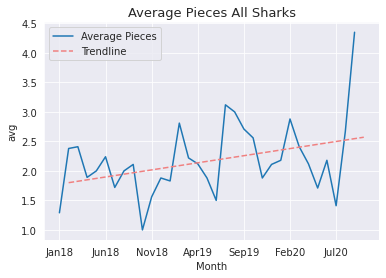

In [40]:
import matplotlib.colors as mcolors

mon = ['Jan18', 'Feb18', 'Mar18', 'Apr18', 'May18', 'Jun18', 'Jul18', 'Aug18', 'Sep18', 'Oct18', 'Nov18', 'Dec18',
      'Jan19', 'Feb19', 'Mar19', 'Apr19', 'May19', 'Jun19', 'Jul19', 'Aug19', 'Sep19', 'Oct19', 'Nov19', 'Dec19',
       'Jan20', 'Feb20', 'Mar20', 'Apr20', 'May20', 'Jun20', 'Jul20', 'Aug20', 'Sep20'
      ]
stats['month_num'] = stats.index + 1
stats['new_mon'] = mon

a1 = stats.plot(x='new_mon', y='avg_pieces', label='Average Pieces');
a1.set_xlabel('Month');
a1.set_ylabel('avg');
a1.set_title('Average Pieces All Sharks', size=13);
y = stats.avg_pieces
x = stats.month_num
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"--", c='lightcoral', label='Trendline')

#plt.plot(stats['new_mon'],
 #        stats['drop_eat_pct'],
  #       label = 'Drop/Target %');
plt.legend(loc='best');

In [31]:
# np.polyfit(x.astype(float),y, 1)

In [38]:
counts

index  counts
0  month       0

In [42]:
df.iloc[2,0]

Timestamp('2017-12-09 00:00:00')

In [41]:
df

Date  Eat_Ross  Eat_Chandler  Eat_BT1  Eat_BT2  Eat_BT3  Eat_BT4  \
0   2017-12-05       0.0           5.0      3.0      6.0      5.0      4.0   
1   2017-12-07       1.0           0.0      0.0      2.0      0.0      0.0   
2   2017-12-09       NaN           NaN      NaN      NaN      NaN      NaN   
3   2017-12-10       5.0           1.0      1.0      3.0      2.0      2.0   
4   2017-12-12       2.0           2.0      0.0      5.0      2.0      4.0   
..         ...       ...           ...      ...      ...      ...      ...   
577 2020-09-22       6.0           0.0      1.0      2.0      6.0      0.0   
578 2020-09-24       0.0           9.0      0.0      7.0      5.0      5.0   
579 2020-09-26       NaN           NaN      NaN      NaN      NaN      NaN   
580 2020-09-27       5.0           6.0      3.0      6.0      4.0      6.0   
581 2020-09-29      10.0           3.0      1.0      1.0      4.0      2.0   

     Eat_BT5  Eat_GR1  Eat_GR2  ...  Bluefish  Mahi  Goggle Eye  \
0        4.0      0.0      0.0  ...       0.0   0.0         0.0   
1        0.0      0.0      0.0  ...       0.0   0.0         0.0   
2        NaN      2.0      0.0  ...       0.0   0.0         0.0   
3        0.0      NaN      NaN  ...       0.0   0.0         0.0   
4        5.0      0.0      2.0  ...       0.0   0.0         0.0   
..       ...      ...      ...  ...       ...   ...         ...   
577      4.0      1.0      0.0  ...       0.0   0.0         0.0   
578      7.0      0.0      1.0  ...       0.0   0.0         0.0   
579      NaN      4.0      0.0  ...       0.0   0.0         0.0   
580      3.0      NaN      NaN  ...       0.0   0.0         0.0   
581      7.0      4.0      4.0  ...       0.0   0.0         0.0   

     Humbolt Squid  BT/SB Location (1-6)  GR Location (1-6)  \
0              0.0                   1.0                3.0   
1              0.0                   1.0                3.0   
2              0.0                   NaN                3.0   
3              0.0                   1.0                NaN   
4              0.0                   1.0                3.0   
..             ...                   ...                ...   
577            0.0                   2.0                1.0   
578            0.0                   4.0                2.0   
579            0.0                   NaN                3.0   
580            0.0                   3.0                NaN   
581            0.0                   1.0                4.0   

                            food_combo      month  year       day  
0                         Saury_Garlic   December  2017   Tuesday  
1    Blue Runner_Squid_Mackerel_Garlic   December  2017  Thursday  
2                       Herring_Garlic   December  2017  Saturday  
3                      Mackerel_Garlic   December  2017    Sunday  
4                         Saury_Garlic   December  2017   Tuesday  
..                                 ...        ...   ...       ...  
577                       Saury_Garlic  September  2020   Tuesday  
578           Blue Runner_Squid_Garlic  September  2020  Thursday  
579                            Herring  September  2020  Saturday  
580                    Mackerel_Garlic  September  2020    Sunday  
581                       Saury_Garlic  September  2020   Tuesday  

[582 rows x 65 columns]

In [49]:
df_test = df[df.year == 2018]
df_test = df_test[df.month == 'January']
df_test.Drop_BT1

16     6.0
17     2.0
18     NaN
19     1.0
20     0.0
21     0.0
22     NaN
23     0.0
24     6.0
25     0.0
26     NaN
27     0.0
28     0.0
29     0.0
30     NaN
31     0.0
32    10.0
Name: Drop_BT1, dtype: float64